# Research Project 
## Twitter API and College Accounts

Authors: Christina Jue, Emerald Bismaputra

### Summary
The goal of the research project was to gain insight into three college user accounts and study the various attributes that could determine or contribute to their popularity. The project also served as an opportunity to learn about the Twitter API and gathering real-world data and applying it to statistical analysis.

### Methodology
Data collection and analysis was done using Jupiter Notebook and the Python coding language. Data was gathered using the Tweepy Python library. Twitter’s “Elevated” access from its developer API was obtained to college the necessary information. Code was designed to compare the size of each account and their influence. Metrics such as account age (in days), total number of tweets, and total followers were used for statistical analysis.
The attributes of each tweet in the account were also collected such as date and time of tweet’s creation, number of likes, number of retweets, number of hashtags used, as well as the day of the week the tweet was posted.
Each call to the Twitter API had a limit of pulling 200 tweets so code was designed in the form of a while loop to parse through the archive of each user.The id number was used to ensure that each pull grabbed a different set of tweets dating back to the first tweet. The extracted tweets and the attributes were stored in a Pandas data frame for later analysis.

The number of likes and retweets were used as the metrics to measure how popular a tweet was. The number of hashtags used in a tweet was a variable to test for affecting popularity.


### Importing Libraries

In [3]:
import tweepy
#from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from datetime import datetime as dt 
from datetime import timezone
import json


### Initializing Individual Tweet Collection

In [4]:
# Fill the X's with the credentials obtained by

consumer_key = 'XXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXX'
access_key = 'XXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXX'

# Function to extract tweets
def get_tweets(username):

    # Authorization to consumer key and consumer secret
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

    # Access to user's access key and access secret
    auth.set_access_token(access_key, access_secret)

    # Calling api
    api = tweepy.API(auth, wait_on_rate_limit=True)

    all_tweets = []
    start = api.user_timeline(screen_name=username,count=20)
    
    all_tweets.extend(start)
    
    oldest = all_tweets[-1].id - 1
    #loop to pull sets of 200 tweets at a time from most recent to oldest.
    while len(start) > 0:
        start = api.user_timeline(screen_name = username,count=200,max_id=oldest)
        all_tweets.extend(start)
        oldest = all_tweets[-1].id - 1
        print("...%s tweets downloaded so far" % (len(all_tweets)))
    print('all done')
    
    hashtags_len = []
    dates, likes, retweets,followers, id_num = [], [],[],[],[]
    for tweet in all_tweets:
        id_num.append(tweet.id_str)
        dates.append(tweet.created_at)
        likes.append(tweet.favorite_count)
        retweets.append(tweet.retweet_count)
        hashtags_len.append(len(tweet.entities['hashtags']))
    
    tweetpd = pd.DataFrame({'id_num': id_num, 'Dates': dates, 'Likes': likes, 'Retweets': retweets,\
                           'Hashtag_num': hashtags_len})
    #splits date apart for detailed analysis
    tweetpd['Dates'] = pd.to_datetime(tweetpd.Dates).dt.tz_convert('US/Mountain')
    tweetpd['Weekday'] = tweetpd['Dates'].dt.dayofweek
    tweetpd['Months']=tweetpd['Dates'].dt.month
    tweetpd['Years']=tweetpd['Dates'].dt.year
    tweetpd['DayOfWeek']=tweetpd['Dates'].dt.day_name()

    tweetpd['Dates'] = tweetpd['Dates'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    return tweetpd
        
print("Getting Tweets for Uarizona Cast"+'\n')
cast = get_tweets('UarizonaCAST')
print(cast)

Getting Tweets for Uarizona Cast

...220 tweets downloaded so far
...420 tweets downloaded so far
...620 tweets downloaded so far
...820 tweets downloaded so far
...1020 tweets downloaded so far
...1219 tweets downloaded so far
...1368 tweets downloaded so far
...1368 tweets downloaded so far
all done
                   id_num                Dates  Likes  Retweets  Hashtag_num  \
0     1522328296561778688  2022-05-05 15:32:04      4         1            0   
1     1522003166635638785  2022-05-04 18:00:07      3         0            0   
2     1521627333588889601  2022-05-03 17:06:41      8         1            1   
3     1521535084993646593  2022-05-03 11:00:07      4         3            0   
4     1521263294438428674  2022-05-02 17:00:07      2         2            1   
...                   ...                  ...    ...       ...          ...   
1363   248144468337885186  2012-09-18 13:40:26      0         3            2   
1364   248074954988470272  2012-09-18 09:04:12      0    

The above code collects all the tweets from an account and then adds them to a Pandas data frame. An overview of the data was displayed in the console.

### Collecting status data for each account

In [ ]:
from tweepy import OAuthHandler
from tweepy import API
from datetime import datetime, date, time, timedelta, timezone

CONSUMER_KEY = "xxxxxxxx"
CONSUMER_SECRET = "xxxxxxx"
OAUTH_TOKEN = "xxxxxx"
OAUTH_TOKEN_SECRET = "xxxxxx"
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = API(auth, wait_on_rate_limit=True)

account_list =["UarizonaCAST", "uarizonaonline", "uarizona"]
if len(account_list) > 0:
  for account in account_list:
    print("Getting data for " + account)
    item = api.get_user(screen_name = account)
    print("name: " + item.name)
    print("screen_name: " + item.screen_name)
    print("description: " + item.description)
    print("statuses_count: " + str(item.statuses_count))
    print("friends_count: " + str(item.friends_count))
    print("followers_count: " + str(item.followers_count))
    print("")

An overview of all the status attributes of the three accounts.

Getting data for UarizonaCAST<br>
name: College of Applied Science & Technology<br>
screen_name: UarizonaCAST<br>
description: Future-Focused, Career-Ready. The College of Applied Science & Technology at the University of Arizona.<br>
statuses_count: 1369<br>
friends_count: 545<br>
followers_count: 737<br>

Getting data for uarizonaonline<br>
name: Arizona Online<br>
screen_name: uarizonaonline<br>
description: The Official Twitter Page of The University of Arizona's Online Campus. Earn your degree anywhere.<br>
statuses_count: 1359<br>
friends_count: 247<br>
followers_count: 1392<br>

Getting data for uarizona<br>
name: University of Arizona<br>
screen_name: uarizona<br>
description: Whether we are touching an asteroid or determining how we feed 9 billion people, Arizona Wildcats ask bigger questions to get better answers. #BearDown<br>
statuses_count: 33081<br>
friends_count: 768<br>
followers_count: 163855<br>

In [14]:
def checkUser(screenname):
    item = api.get_user(screen_name = screenname)
    tweets = item.statuses_count
    account_created_date = item.created_at
    delta = datetime.now(timezone.utc) - account_created_date
    account_age_days = delta.days
    if account_age_days > 0:
        avg_tweets_perday = float(tweets)/float(account_age_days)
    return (account_age_days, avg_tweets_perday)

def followers(account):
        item = api.get_user(screen_name = account)
        return item.followers_count
    
#lists of all the followers for each account
                       
uarizonacast_followers = followers("UarizonaCast")                 
uarizonaonline_followers = followers("uarizonaonline")   
uarizona_followers = followers("uarizona")
accounts_followers = [uarizonacast_followers, uarizonaonline_followers, uarizona_followers]
total_tweets = []
account_list =["UarizonaCAST", "uarizonaonline", "uarizona"]
if len(account_list) > 0:
  for account in account_list:
    item = api.get_user(screen_name = account)
    total_tweets.append(item.statuses_count)

In [ ]:
for account in account_list:
    print("name: " + account)
    account_age_days, avg_tweets_perday = checkUser(account)
    print("Average tweets per day: " + "%.2f"%(avg_tweets_perday))
    print("Account age (in days): " + str(account_age_days))
    print('')

#### Average Tweets per day for Accounts

name: UarizonaCAST<br>
Average tweets per day: 0.39<br>
Account age (in days): 3520<br>

name: uarizonaonline<br>
Average tweets per day: 0.52<br>
Account age (in days): 2622<br>

name: uarizona<br>
Average tweets per day: 6.49<br>
Account age (in days): 5098<br>

In [12]:
def castPlot():
    plt.suptitle('UarizonaCast Account')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.scatter(cast['Hashtag_num'], cast['Likes'], s=30)
    plt.title('Number of Hashtags Used vs. Likes')
    plt.ylabel('Number of Likes')
    plt.xlabel('Number of Hashtags Used')
    plt.subplot(1,2,2)
    plt.scatter(cast['Hashtag_num'], cast['Retweets'], s=30)
    plt.title('Number of Hashtags Used vs. Retweets')
    plt.ylabel('Number of Retweets')
    plt.xlabel('Number of Hashtags Used')
    plt.show()

In [16]:
uarizonacast_accountage, uarizonacast_avg_tweets = checkUser("UarizonaCAST")
uarizonaonline_accountage, uarizonaonline_avg_tweets = checkUser("uarizonaonline")
uarizona_accountage, uarizona_avg_tweets = checkUser("uarizona")

#accountage and accounts_avg_tweets variables

accounts_accountage = [uarizonacast_accountage, uarizonaonline_accountage, uarizona_accountage]
accounts_avg_tweets = [uarizonacast_avg_tweets, uarizonaonline_avg_tweets, uarizona_avg_tweets]

## Conclusion

#### Models for UarizonaCAST Account
The models show hashtag usage for the UarizonaCAST college account. They show that there is a weak relationship between the number of hashtags used and the number of retweets. The tweets that had the most retweets had no hashtags, while tweets with three or more had little to no retweets. The number of likes and hashtags has a slight negative correlation, the increase of hashtags decreased the number of likes. 

<Figure size 432x288 with 0 Axes>

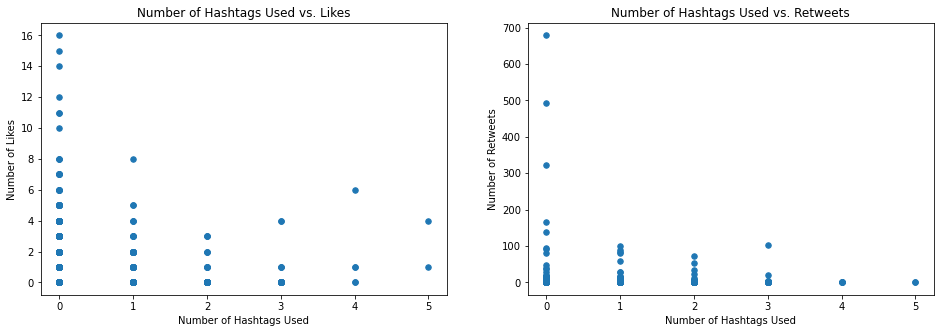

In [11]:
castPlot()

In [ ]:
online=get_tweets('uaonline')
def onlinePlot():
    plt.suptitle('uarizonaonline Account')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.scatter(online['Hashtag_num'], online['Likes'], s=30)
    plt.title('Number of Hashtags Used vs Likes')
    plt.ylabel('Number of Likes')
    plt.xlabel('Number of Hashtags Used')
    plt.subplot(1,2,2)
    plt.scatter(online['Hashtag_num'], online['Retweets'], s=30)
    plt.title('Number of Hashtags Used vs Retweets')
    plt.ylabel('Number of Retweets')
    plt.xlabel('Number of Hashtags Used')
    plt.show()
    plt.savefig('UAOnlinesub.png')

#### Models for Uarizonaonline account
The models compare the number of likes and retweets against the number of hashtags used in the tweet for the uarizonaonline Twitter account. The results show that there is little correlation between the two metrics. 


<Figure size 432x288 with 0 Axes>

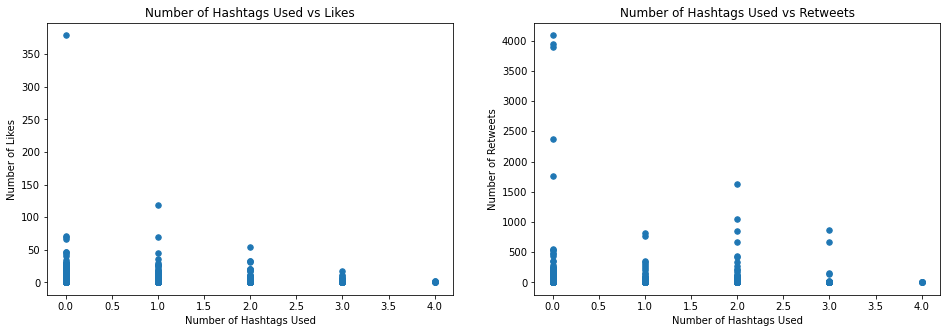

<Figure size 432x288 with 0 Axes>

In [10]:
onlinePlot()

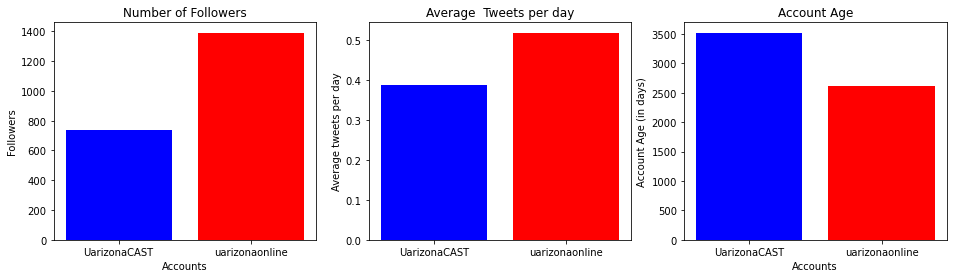

<Figure size 432x288 with 0 Axes>

In [18]:
two_acct_followers =[uarizonacast_followers, uarizonaonline_followers]
two_acct_list=["UarizonaCAST", "uarizonaonline"]
two_acct_avg=[uarizonacast_avg_tweets, uarizonaonline_avg_tweets]
two_acct_age=[uarizonacast_accountage, uarizonaonline_accountage]

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.bar(two_acct_list, two_acct_followers, color=['b', 'r'])
plt.ylabel("Followers")
plt.xlabel("Accounts")
plt.title("Number of Followers")

plt.subplot(1,3,2)
plt.bar(two_acct_list, two_acct_avg, color=['b', 'r'])
plt.ylabel("Average tweets per day")
plt.title("Average  Tweets per day")
plt.subplot(1,3,3)
plt.bar(two_acct_list, two_acct_age, color=['b', 'r'])
plt.title('Account Age')
plt.ylabel('Account Age (in days)')
plt.xlabel('Accounts')

plt.show()
plt.tight_layout()

UarizonaCAST followers count: 737
uarizonaonline followers count: 1391
uarizona followers count: 163887

UarizonaCAST total tweets: 1369
uarizonaonline total tweets: 1360
uarizona total tweets: 33081


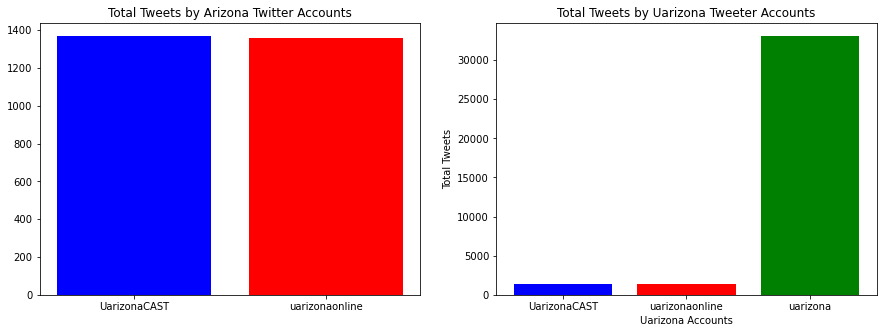

In [27]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Total Tweets by Arizona Twitter Accounts')
plt.bar(two_acct_list, total_tweets[:-1], color=['b', 'r'])
plt.subplot(1,2,2)
plt.xlabel("Uarizona Accounts")
plt.ylabel("Total Tweets")
plt.title("Total Tweets by Uarizona Tweeter Accounts")
plt.bar(account_list, total_tweets, color=['b', 'r', 'g'])

for i in range(len(accounts_followers)):
    print(account_list[i], 'followers count:', accounts_followers[i])
    
print('')
    
for i in range(len(total_tweets)):
    print(account_list[i], 'total tweets:', total_tweets[i])

The Total Tweets of these 2 accounts is almost the same, but the amount difference of their followers is approx. 500.

All of the above explanations might not be accurate as we only use 2 accounts to compare. We first planned to use 3 accounts: UarizonaCast, uarizonaonline, and uarizona. But when we plotted the 3 accounts, it seemed to be an unfair comparison because uarizona is the main account of University of Arizona. So definitely, it has way more followers than the other 2 accounts.


#### Comparison of UarizonaCAST and uarizonaonline
These two accounts are similar in scale however, uarizona online has a higher average of tweets per day and almost double the followers. Despite being the "younger" account, it is a lot more active and gained a larger following faster. 

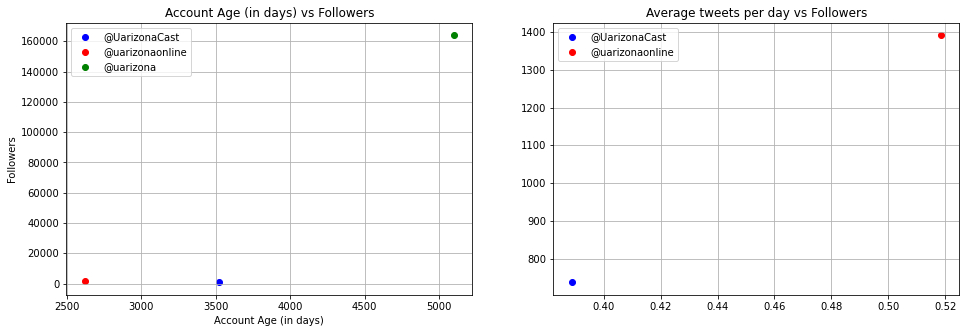

In [19]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.xlabel("Account Age (in days)")
plt.ylabel("Followers")
plt.title("Account Age (in days) vs Followers")
plt.scatter(uarizonacast_accountage, uarizonacast_followers, marker='o', color='b', label='@UarizonaCast')
plt.scatter(uarizonaonline_accountage, uarizonaonline_followers, marker='o', color='r', label='@uarizonaonline')
plt.scatter(uarizona_accountage, uarizona_followers, marker='o', color='g', label='@uarizona')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.scatter(uarizonacast_avg_tweets, uarizonacast_followers, color='b', label='@UarizonaCast')
plt.scatter(uarizonaonline_avg_tweets, uarizonaonline_followers, color='r', label='@uarizonaonline')
plt.title("Average tweets per day vs Followers")
plt.grid(True)
plt.legend()

UarizonaCast account age is 3511 days and uarizonaonline account age is 2612 days. UarizonaCast has been existed approximately 1000 days longer than uarizonaonline, but uarizonaonline has more followers. This could mean 2 things: lesser account age is equal to more followers, or account age is irrelevant to the followers they will have. We think it makes more sense to believe that account age is irrelevant to the followers they will have. 

UarizonaCast’s average tweets per day is 0.39 and uarizonaonline’s average tweets per day is 0.52. uarizonaonline tweets more in a day than UarizonaCast, and the graph shows that uarizonaonline has more followers. This means that more tweets in a day can help to boost followers.